In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

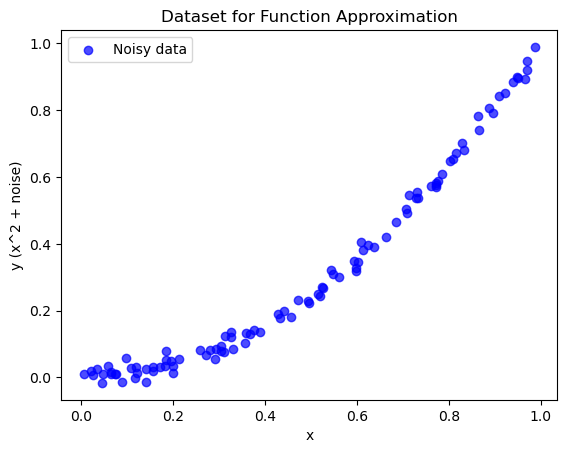

In [2]:
# Step 1: Create the dataset
# Generate random points in the interval [0, 1]
np.random.seed(42)
x = np.random.uniform(0, 1, 100)
y = x**2 + np.random.normal(0, 0.02, size=x.shape)

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

plt.scatter(x, y, color='blue', alpha=0.7, label='Noisy data')
plt.xlabel('x')
plt.ylabel('y (x^2 + noise)')
plt.title('Dataset for Function Approximation')
plt.legend()
plt.show()

In [3]:
class FunctionApproximator(nn.Module):
    def __init__(self):
        super(FunctionApproximator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

In [4]:
model = FunctionApproximator()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

Epoch 0/1000, Loss: 0.1735209822654724
Epoch 100/1000, Loss: 0.0003269030130468309
Epoch 200/1000, Loss: 0.00030413438798859715
Epoch 300/1000, Loss: 0.00030133852851577103
Epoch 400/1000, Loss: 0.0002990497450809926
Epoch 500/1000, Loss: 0.00029734778217971325
Epoch 600/1000, Loss: 0.0002962077269330621
Epoch 700/1000, Loss: 0.00029528469895012677
Epoch 800/1000, Loss: 0.00029441548394970596
Epoch 900/1000, Loss: 0.0002936461241915822


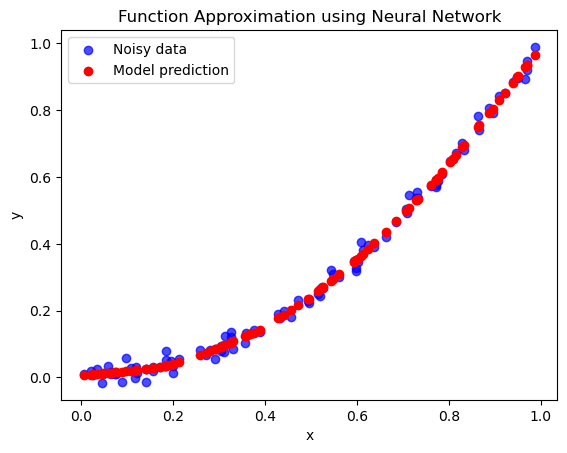

In [7]:
# Step 4: Plot the predictions
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()

plt.scatter(x, y, color='blue', alpha=0.7, label='Noisy data')
plt.scatter(x, predictions, color='red', label='Model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation using Neural Network')
plt.legend()
plt.show()